In [1]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
colors2 = ['#2D2926', '#E50914']
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


# Chủ đề của dữ liệu:
- Tập dữ liệu thể hiện các thông tin về show và movie trên netflix, dữ liệu được thu thập từ tháng 7 2022.
- link tới dữ liệu : https://www.kaggle.com/code/nguyenthicamlai/eda-on-netflix-movies-and-tv-shows/data

In [3]:
data_df = pd.read_csv('../input/netflix/titles.csv',error_bad_lines=False, index_col=False)
data_df.head()

C:\Users\LAP12988-local\AppData\Local\Temp\ipykernel_19524\3652010998.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_df = pd.read_csv('titles.csv',error_bad_lines=False, index_col=False)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [4]:
len(data_df)

5850

# Tìm hiểu  về dữ liệu

## Số dòng và cột trong dữ liệu.

In [5]:
num_rows,num_cols=data_df.shape
print('Dữ liệu bao gồm: {} dòng và {} cột'.format(num_rows,num_cols))

Dữ liệu bao gồm: 5850 dòng và 15 cột


## Dữ liệu có bị lặp lại hay không ? 

In [6]:
have_duplicated_rows=data_df.duplicated().any()
print(have_duplicated_rows)

False


- Dữ liệu không có dòng bị lặp lại.

In [7]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

## Ý nghĩa của các cột trong dữ liệu :
- id: id của movie/show trên justWatch.
- title: tên của movie/show.
- show_type: là TV show(chương trình truyền hình) hoặc là movie.
- description: Mô tả về nội dung của movie/show.
- release_year: Năm phát hành movie/show.
- age_certification: rating về độ tuổi thích hợp để xem movie/show.
- runtime: độ dài một tập của tvshow hoặc độ dài của movie.
- genres: một list về thể loại của movie/show.
- production_countries: quốc gia sản xuất movie/show.
- seasons: số season của tvshow.
- imdb_id: id imdb của movie/tvshow trên imdb.
- imdb_score: điểm của movie/tvshow trên imdb.
- imdb_votes: số votes của movie/tvshow trên imdb.
- tmdb_popularity: độ phổ biến của movie/tvshow trên tmdb.
- tmdb_score: điểm của movie/tvshow trên tmdb.

## Kiểm tra kiểu dữ liệu của các cột trong dữ liệu:

In [8]:
col_dtypes=data_df.dtypes
print(col_dtypes)

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object


- Dữ liệu gồm nhiều cột có type là object nên ta sẽ cần phải xem bên trong object chứa các kiểu dữ liệu gì.

In [9]:
def open_object_dtype(s):
    df=pd.Series(s)
    a=df.apply(lambda x : type(x)).unique()
    dtypes = set(a)
    return dtypes

In [10]:
objects_key=(data_df.loc[:, data_df.dtypes == object]).keys()
print("numer of object columns:",len(objects_key))
for key in objects_key:
    print("types of ",key," is ",open_object_dtype(data_df[key]))

numer of object columns: 8
types of  id  is  {<class 'str'>}
types of  title  is  {<class 'str'>, <class 'float'>}
types of  type  is  {<class 'str'>}
types of  description  is  {<class 'str'>, <class 'float'>}
types of  age_certification  is  {<class 'str'>, <class 'float'>}
types of  genres  is  {<class 'str'>}
types of  production_countries  is  {<class 'str'>}
types of  imdb_id  is  {<class 'str'>, <class 'float'>}


- Dữ liệu có 4 cột là title, description, age_certification và imdb_id là chứa class string và float nên ta sẽ thử in dữ liệu ra xem thử.

In [11]:
data_df[['title','description','age_certification','imdb_id']]

,title,description,age_certification,imdb_id
0,Five Came Back: The Reference Films,This collection includes 12 World War II-era p...,TV-MA,NaN
1,Taxi Driver,A mentally unstable Vietnam War veteran works ...,R,tt0075314
2,Deliverance,Intent on seeing the Cahulawassee River before...,R,tt0068473
3,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",PG,tt0071853
4,The Dirty Dozen,12 American military prisoners in World War II...,NaN,tt0061578
...,...,...,...,...
5845,Fine Wine,A beautiful love story that can happen between...,NaN,tt13857480
5846,C/O Kaadhal,A heart warming film that explores the concept...,NaN,tt11803618
5847,Lokillo,A controversial TV host and comedian who has b...,NaN,tt14585902
5848,Dad Stop Embarrassing Me - The Afterparty,"Jamie Foxx, David Alan Grier and more from the...",PG-13,NaN


- Có vẻ như cũng không có gì đặc biệt, ta có thể chuyển các cột này qua string để dễ xử lý hơn trong quá trình trực quan hóa bên dưới.

In [12]:
data_df['title']=data_df['title'].astype('string')
data_df['description']=data_df['description'].astype('string')
data_df['age_certification']=data_df['age_certification'].astype('string')
data_df['id']=data_df['id'].astype('string')
data_df['type']=data_df['type'].astype('string')
data_df['genres']=data_df['genres'].astype('string')
data_df['production_countries']=data_df['production_countries'].astype('string')
data_df['imdb_id']=data_df['imdb_id'].astype('string')

In [13]:
data_df[['title','description','age_certification','imdb_id','id','type','genres','production_countries']]

,title,description,age_certification,imdb_id,id,type,genres,production_countries
0,Five Came Back: The Reference Films,This collection includes 12 World War II-era p...,TV-MA,<NA>,ts300399,SHOW,['documentation'],['US']
1,Taxi Driver,A mentally unstable Vietnam War veteran works ...,R,tt0075314,tm84618,MOVIE,"['drama', 'crime']",['US']
2,Deliverance,Intent on seeing the Cahulawassee River before...,R,tt0068473,tm154986,MOVIE,"['drama', 'action', 'thriller', 'european']",['US']
3,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",PG,tt0071853,tm127384,MOVIE,"['fantasy', 'action', 'comedy']",['GB']
4,The Dirty Dozen,12 American military prisoners in World War II...,<NA>,tt0061578,tm120801,MOVIE,"['war', 'action']","['GB', 'US']"
...,...,...,...,...,...,...,...,...
5845,Fine Wine,A beautiful love story that can happen between...,<NA>,tt13857480,tm1014599,MOVIE,"['romance', 'drama']",['NG']
5846,C/O Kaadhal,A heart warming film that explores the concept...,<NA>,tt11803618,tm898842,MOVIE,['drama'],[]
5847,Lokillo,A controversial TV host and comedian who has b...,<NA>,tt14585902,tm1059008,MOVIE,['comedy'],['CO']
5848,Dad Stop Embarrassing Me - The Afterparty,"Jamie Foxx, David Alan Grier and more from the...",PG-13,<NA>,tm1035612,MOVIE,[],['US']


In [14]:
col_dtypes=data_df.dtypes
print(col_dtypes)

id                       string
title                    string
type                     string
description              string
release_year              int64
age_certification        string
runtime                   int64
genres                   string
production_countries     string
seasons                 float64
imdb_id                  string
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object


## Kiểm tra số lượng missing value của dữ liệu.

In [15]:
print("Shape of the dataset: ", data_df.shape)
print("_______________________________________")
print("Number of null values: ")
print(data_df.isnull().sum().sort_values(ascending=False))
print("_______________________________________")
print("Number of unique values: ")
print(data_df.nunique().sort_values(ascending=False))

Shape of the dataset:  (5850, 15)
_______________________________________
Number of null values: 
seasons                 3744
age_certification       2619
imdb_votes               498
imdb_score               482
imdb_id                  403
tmdb_score               311
tmdb_popularity           91
description               18
title                      1
id                         0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
dtype: int64
_______________________________________
Number of unique values: 
id                      5850
description             5829
title                   5798
imdb_id                 5447
tmdb_popularity         4889
imdb_votes              3880
genres                  1726
production_countries     452
tmdb_score               394
runtime                  202
imdb_score                80
release_year              63
seasons                   26
age_certifi

In [16]:
print("% of null values: ")
for i in data_df.columns:
    if data_df[i].isnull().any():
        print(i,"---------",data_df[i].isnull().sum()*100/data_df.shape[0],"%")
print("_______________________________________")
print("% of unique values: ")
for i in data_df.columns:
        print(i,"---------",data_df[i].nunique()*100/data_df.shape[0],"%")

% of null values: 
title --------- 0.017094017094017096 %
description --------- 0.3076923076923077 %
age_certification --------- 44.76923076923077 %
seasons --------- 64.0 %
imdb_id --------- 6.888888888888889 %
imdb_score --------- 8.239316239316238 %
imdb_votes --------- 8.512820512820513 %
tmdb_popularity --------- 1.5555555555555556 %
tmdb_score --------- 5.316239316239316 %
_______________________________________
% of unique values: 
id --------- 100.0 %
title --------- 99.11111111111111 %
type --------- 0.03418803418803419 %
description --------- 99.64102564102564 %
release_year --------- 1.0769230769230769 %
age_certification --------- 0.18803418803418803 %
runtime --------- 3.452991452991453 %
genres --------- 29.504273504273506 %
production_countries --------- 7.726495726495727 %
seasons --------- 0.4444444444444444 %
imdb_id --------- 93.11111111111111 %
imdb_score --------- 1.3675213675213675 %
imdb_votes --------- 66.32478632478633 %
tmdb_popularity --------- 83.57264957264

- Có vẻ như cột seasons và age certification thiếu khá nhiều, ta sẽ in các cột null của hai cột này xem thử.  

In [17]:
data_df[data_df["seasons"].isnull()==True]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,<NA>,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,<NA>,35,[],['US'],NaN,<NA>,NaN,NaN,NaN,NaN
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,<NA>,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,<NA>,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,<NA>,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300


In [18]:
data_df[data_df["age_certification"].isnull()==True]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,<NA>,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.6
10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,<NA>,158,"['action', 'drama', 'war']","['GB', 'US']",NaN,tt0054953,7.5,50748.0,13.844,7.3
13,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,<NA>,115,"['romance', 'comedy']",['US'],NaN,tt0047673,7.5,42488.0,8.915,7.2
14,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,<NA>,77,"['drama', 'crime', 'comedy']",['EG'],NaN,tt0051390,7.5,4471.0,5.546,7.3
17,tm14350,Alexandria… Why?,MOVIE,Set against the panoramic backdrop of war-torn...,1979,<NA>,133,['drama'],['EG'],NaN,tt0077751,7.2,1727.0,1.370,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,<NA>,35,[],['US'],NaN,<NA>,NaN,NaN,NaN,NaN
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,<NA>,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,<NA>,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,<NA>,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.3


In [19]:
data_df[data_df["imdb_score"].isnull()==True]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,<NA>,NaN,NaN,0.600,NaN
75,tm132164,Bill Hicks: Sane Man,MOVIE,Sane Man was filmed before Bill recorded ‘Dang...,1989,R,80,['comedy'],['US'],NaN,<NA>,NaN,NaN,3.377,7.5
145,ts251477,My First Errand,SHOW,“Hajimete no Otsukai” (First Errand) is a Japa...,1991,TV-G,18,"['documentation', 'family', 'reality']",['JP'],12.0,<NA>,NaN,NaN,7.730,7.8
177,ts224786,Escalona,SHOW,"The improbable real life of Rafael Escalona, w...",1991,TV-MA,44,['drama'],['CO'],1.0,<NA>,NaN,NaN,7.352,7.6
180,tm8687,Sam Kinison: Family Entertainment Hour,MOVIE,Get ready to scream with laughter! Sam Kinison...,1991,<NA>,49,['comedy'],['US'],NaN,<NA>,NaN,NaN,1.840,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,tm1225897,Social Man,MOVIE,Two competitive social media Influencers go he...,2021,<NA>,96,"['comedy', 'drama']",[],NaN,tt20198164,NaN,NaN,NaN,NaN
5833,ts307884,HQ Barbers,SHOW,When a family run barber shop in the heart of ...,2021,TV-14,24,['comedy'],['NG'],1.0,<NA>,NaN,NaN,0.840,NaN
5840,tm1216735,Sun of the Soil,MOVIE,"In 14th-century Mali, an ambitious young royal...",2022,<NA>,26,[],[],NaN,<NA>,NaN,NaN,1.179,7.0
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,<NA>,35,[],['US'],NaN,<NA>,NaN,NaN,NaN,NaN


In [20]:
data_df[data_df["tmdb_popularity"].isnull()==True]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
411,ts74931,Kung Fu Panda Awesome Secrets,SHOW,"In this pair of adventures, Po tells the story...",2008,TV-PG,32,"['action', 'animation', 'comedy', 'family']",['US'],1.0,tt6963796,7.1,59.0,NaN,NaN
514,ts137477,Behind Enemy Lines,SHOW,Documentary about the creation of the Commando...,2001,TV-14,49,['drama'],['US'],1.0,tt5170230,7.2,43.0,NaN,NaN
556,ts178360,El cartel 2 - La guerra total,SHOW,Now Pepe Cadena finishes telling the story in ...,2010,TV-MA,44,"['horror', 'thriller', 'war', 'action', 'crime']",['CO'],1.0,tt1667724,6.7,231.0,NaN,NaN
564,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,19,['reality'],[],11.0,tt3062514,9.5,3115.0,NaN,NaN
574,tm712151,Laugh Out Loud,MOVIE,The biggest stand-up comedy event ever in Sout...,2003,<NA>,60,['comedy'],['ZA'],NaN,tt0401575,7.0,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,tm1011248,30 March,MOVIE,"Ali, the fugitive from a murder he does not ev...",2021,<NA>,99,"['crime', 'drama', 'thriller']",[],NaN,tt13694540,4.0,153.0,NaN,NaN
5810,tm1225897,Social Man,MOVIE,Two competitive social media Influencers go he...,2021,<NA>,96,"['comedy', 'drama']",[],NaN,tt20198164,NaN,NaN,NaN,NaN
5823,tm1099342,Devdas Brothers,MOVIE,"After their first heartbreaks, four jilted you...",2021,<NA>,99,['drama'],[],NaN,tt12478372,3.3,51.0,NaN,NaN
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,<NA>,35,[],['US'],NaN,<NA>,NaN,NaN,NaN,NaN


- Ta có thể thấy là ở cột seasons đều là các type movie bị missing đó là do movie thì không có nhiều season mà chỉ có tv/show mới có season, còn đối với cột imdb thì nếu một thông tin bị thiếu các thông tin khác cũng sẽ thiếu, đối với tmdb thì nếu cột tmdb_popularity thiếu thì cột tmdb_score cũng sẽ thiếu.

In [21]:
def missing_ratio(s):
    return s.isna().mean() * 100
def num_diff_vals(s):
    return s.dropna().nunique()

def diff_vals(s):
    return s.dropna().unique()

In [22]:
cate_cols=['id','title','type','description', 'age_certification','genres','production_countries','imdb_id']
numeric_cols=list(set(data_df.keys())-set(cate_cols))

In [23]:
index=['missing_ratio', 'num_diff_vals', 'diff_vals']
cate_col_profiles_df=pd.DataFrame(
     index=index,
     columns=cate_cols)
data_cate_col_df = data_df[cate_cols]
cate_col_profiles_df = data_cate_col_df.agg([missing_ratio,num_diff_vals,diff_vals])

print(cate_col_profiles_df)

                                                              id  \
missing_ratio                                                0.0   
num_diff_vals                                               5850   
diff_vals      [ts300399, tm84618, tm154986, tm127384, tm1208...   

                                                           title  \
missing_ratio                                           0.017094   
num_diff_vals                                               5798   
diff_vals      [Five Came Back: The Reference Films, Taxi Dri...   

                        type  \
missing_ratio            0.0   
num_diff_vals              2   
diff_vals      [SHOW, MOVIE]   

                                                     description  \
missing_ratio                                           0.307692   
num_diff_vals                                               5829   
diff_vals      [This collection includes 12 World War II-era ...   

                                               age_c

In [24]:
cate_cols=['id','title','type','description', 'age_certification','genres','production_countries','imdb_id']
numeric_cols=list(set(data_df.keys())-set(cate_cols))

In [25]:
nume_col_profiles_df=pd.DataFrame(index=['missing_ratio','min','max'],
                                  columns=numeric_cols)

nume_col_profiles_df.loc['missing_ratio',numeric_cols]=np.float64(data_df[numeric_cols].isna().mean()*100)

nume_col_profiles_df.loc['min',numeric_cols]=np.float64(data_df[numeric_cols].min())

nume_col_profiles_df.loc['max',numeric_cols]=np.float64(data_df[numeric_cols].max())

nume_col_profiles_df=nume_col_profiles_df.astype(np.float64)


print(nume_col_profiles_df)

               release_year  tmdb_score  tmdb_popularity  runtime  imdb_score  \
missing_ratio           0.0    5.316239         1.555556      0.0    8.239316   
min                  1945.0    0.500000         0.009442      0.0    1.500000   
max                  2022.0   10.000000      2274.044000    240.0    9.600000   

                 imdb_votes  seasons  
missing_ratio  8.512821e+00     64.0  
min            5.000000e+00      1.0  
max            2.294231e+06     42.0  


## trực quan các dữ liệu dạng numeric bằng boxplot và hist plot để tìm ra phân bố của dữ liệu:

In [26]:
num_cols=["tmdb_score","release_year","imdb_score","tmdb_popularity","imdb_votes"]

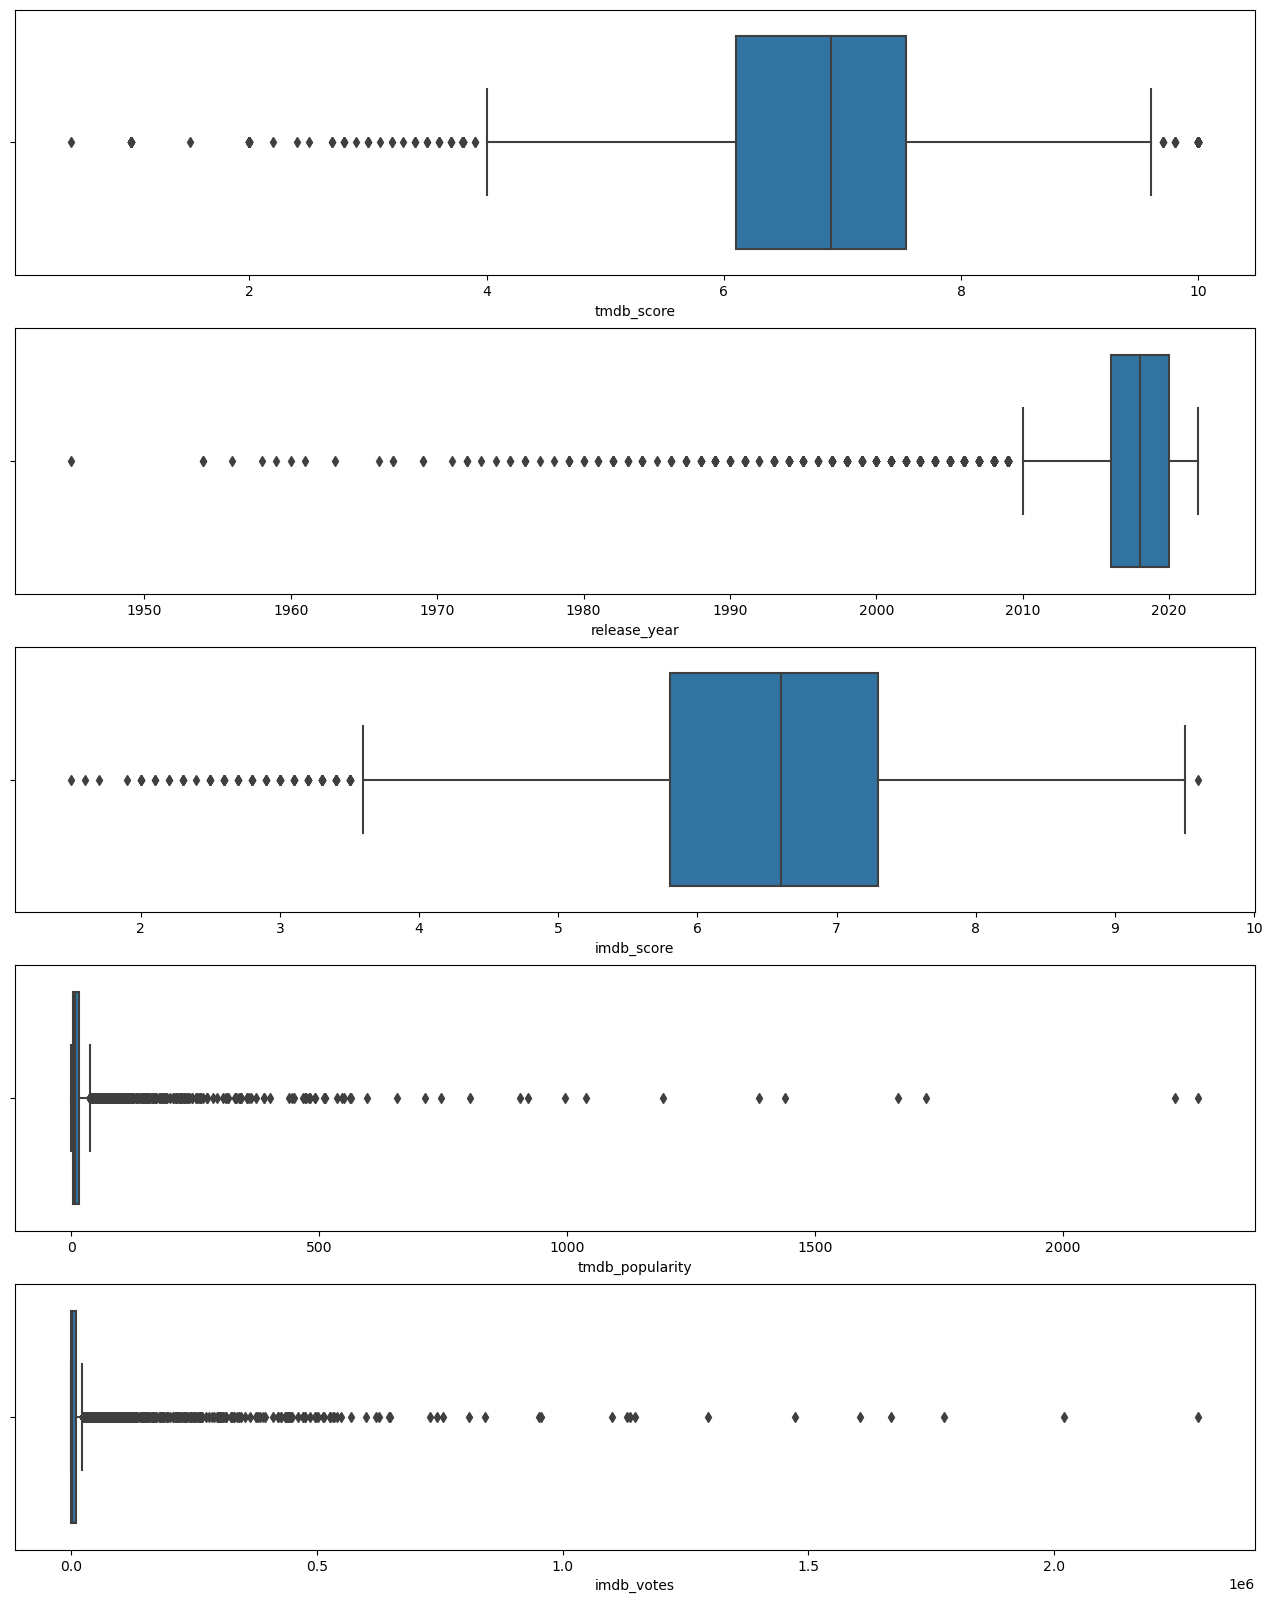

In [27]:
i=0
#j=0
rows=5
cols=1
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (16,20))
for col in num_cols:
    sns.boxplot(ax=axes[i],data=data_df,x=col)
    i=i+1
plt.show()

C:\Users\LAP12988-local\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LAP12988-local\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LAP12988-local\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

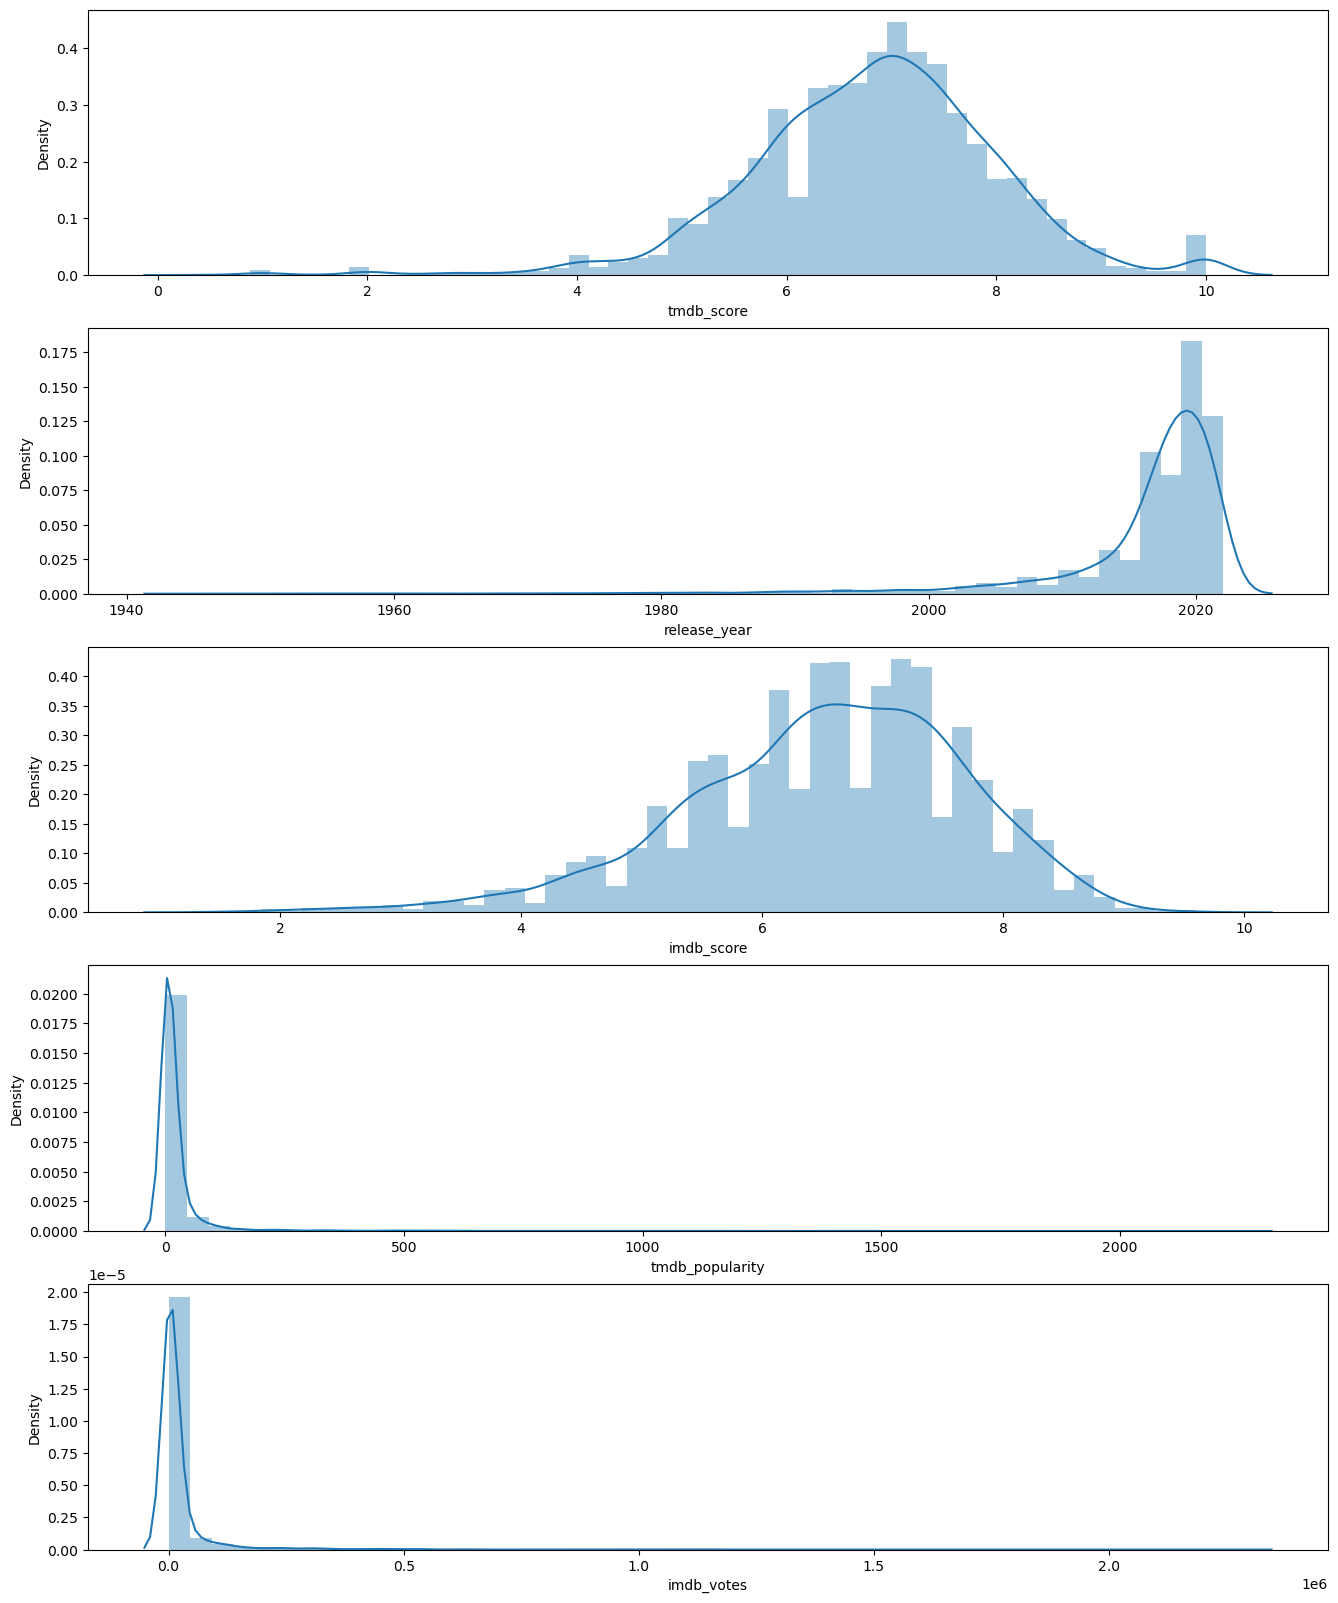

In [28]:
i=0
#j=0
rows=5
cols=1
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (16,20))
for col in num_cols:
    sns.distplot(data_df[col],ax=axes[i])
    i=i+1
plt.show()

- Ta có thể thấy từ boxplot và hist plot các cột imdb_score và tmdb_score có khá nhiều outlier và bị dồn sang bên phải nên ta có thể fill dữ liệu missing value bằng phương pháp median (đối với các cột tmdb popularity,imdb votes có lẽ sẽ không sử dụng nhiều nên có thể drop).

In [29]:
data_df["imdb_score"]=data_df["imdb_score"].fillna(data_df["imdb_score"].median())
data_df["tmdb_score"]=data_df["tmdb_score"].fillna(data_df["tmdb_score"].median())


- Đối với cột không phải loại numeric như age_certification ta có thể fill bằng mode hoặc sử dụng mô hình học máy để dự đoán từ cột description(text classification).

In [30]:
data_df["age_certification"]=data_df["age_certification"].fillna(data_df["age_certification"].mode())


In [31]:
data_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,<NA>,6.6,NaN,0.600,6.900
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,<NA>,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,<NA>,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,6.900
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,<NA>,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,6.900
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,<NA>,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,<NA>,6.6,NaN,1.296,10.000


In [32]:
data_df.describe().T.style.set_properties(**{"background-color": "#FBA7A7", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
release_year,5850.000000,2016.417094,6.937726,1945.000000,2016.000000,2018.000000,2020.000000,2022.000000
runtime,5850.000000,76.888889,39.002509,0.000000,44.000000,83.000000,104.000000,240.000000
seasons,2106.000000,2.162868,2.689041,1.000000,1.000000,1.000000,2.000000,42.000000
imdb_score,5850.000000,6.518205,1.115111,1.500000,5.900000,6.600000,7.300000,9.600000
imdb_votes,5352.000000,23439.382474,95820.470909,5.000000,516.750000,2233.500000,9494.000000,2294231.000000
tmdb_popularity,5759.000000,22.637925,81.680263,0.009442,2.728500,6.821000,16.590000,2274.044000
tmdb_score,5850.000000,6.832940,1.138962,0.500000,6.200000,6.900000,7.500000,10.000000


# Trực quan hóa dữ liệu: 

In [33]:
list_type_count=data_df["type"].value_counts().tolist()
print(list_type_count)
total=sum(list_type_count)
for i in range (len(list_type_count)):
    list_type_count[i]=list_type_count[i]/total*100
list_type_count

[3744, 2106]


[64.0, 36.0]

In [34]:
print(list_type_count.sort())

None


In [35]:
def count_plot(dataframe,index,col_name,axes):
    #print(col_name)
    list_type_count=data_df[col_name].value_counts().tolist()
    list_type_count.sort(reverse=True)
    total=sum(list_type_count)
    for i in range (len(list_type_count)):
        temp=list_type_count[i]
        list_type_count[i]=str(temp)+":"+str(round(list_type_count[i]/total*100,1))+'%'
    ax=sns.countplot(data=data_df,ax=axes[index], x = col_name,palette = colors2,order = data_df[col_name].value_counts().index)
    ax.bar_label(container=ax.containers[0], labels= list_type_count)
    

In [36]:
cat_cols=['type', 'age_certification']


## Trực quan hóa số lượng của hai loại movie/tvshow và age certification.

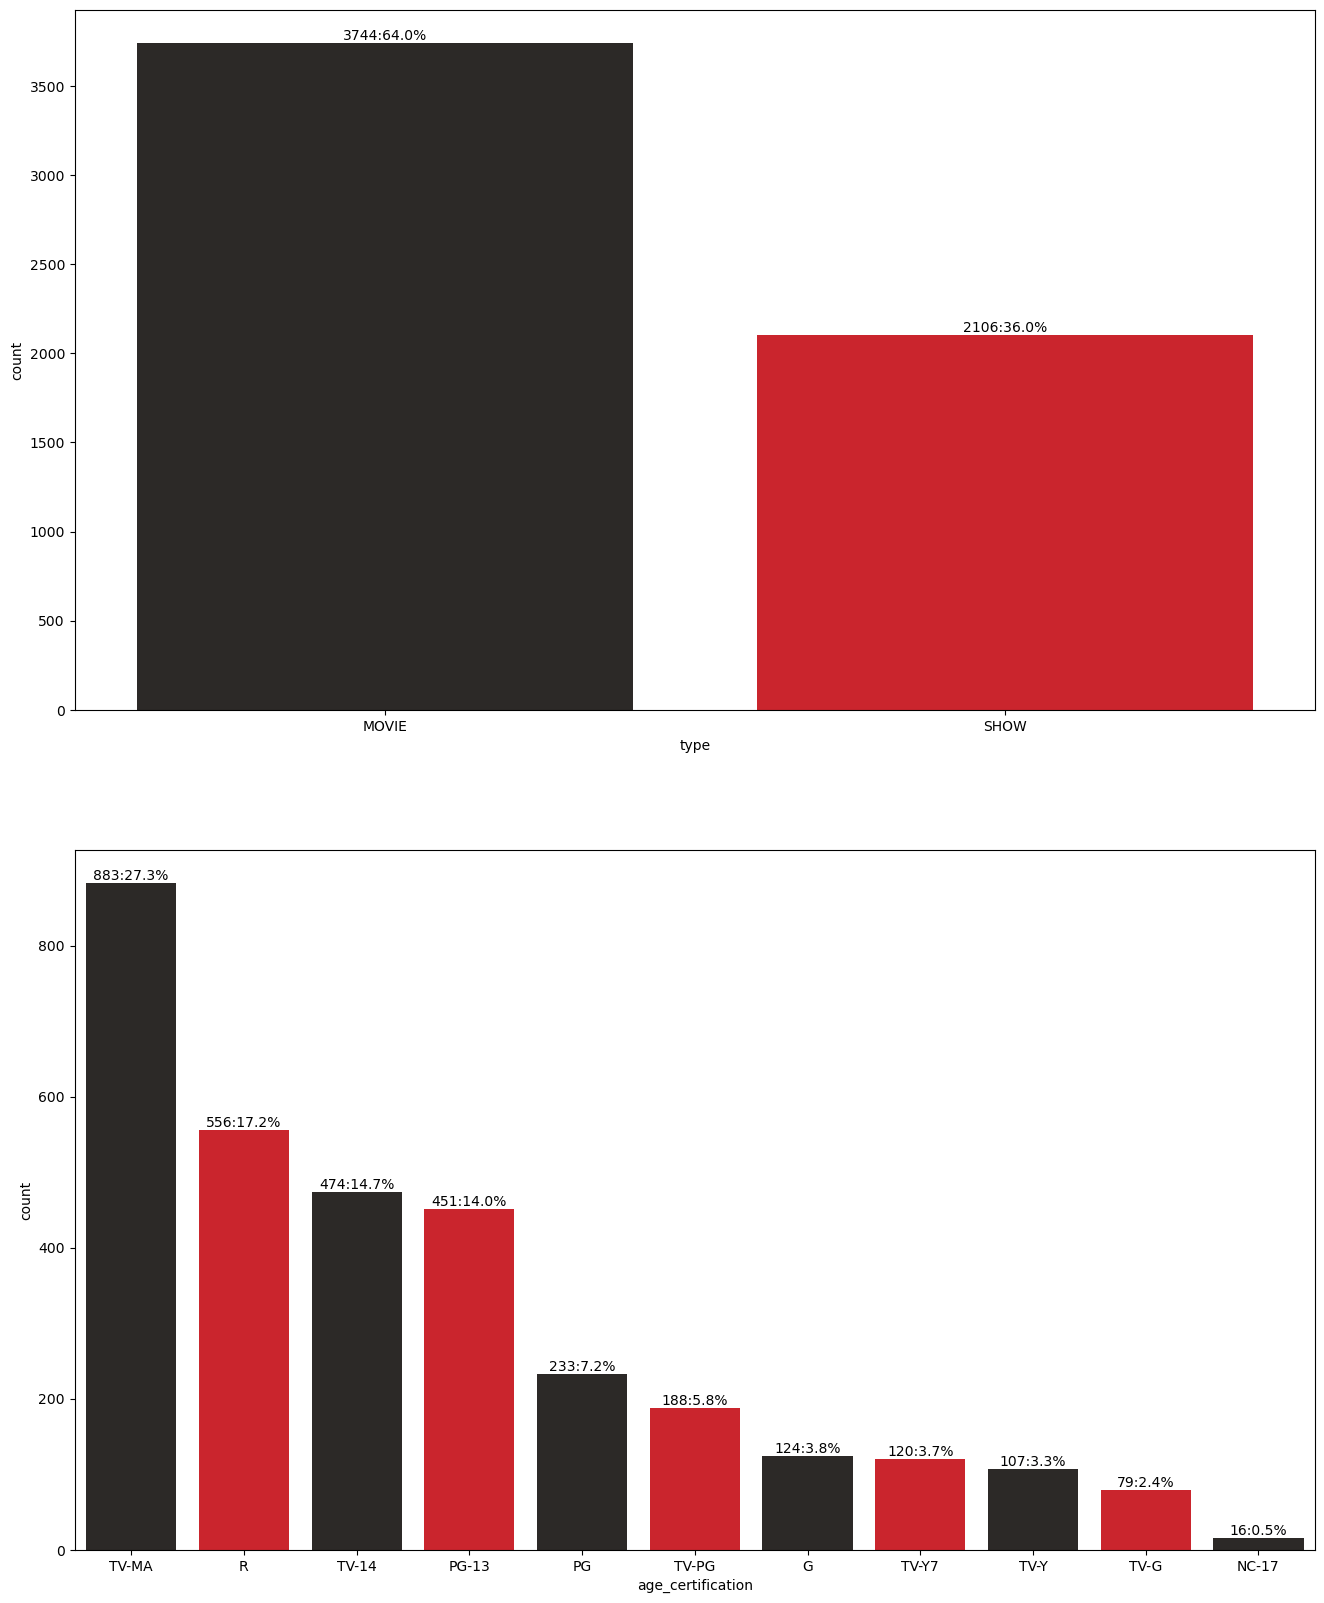

In [37]:
fig,axes = plt.subplots(nrows = 2, ncols = 1, figsize = (16,20))
i=0
for col_name in cat_cols:
    #print(col_name)
    count_plot(data_df,i,col_name,axes)
    i=i+1
plt.show()

- Netflix sản xuất phần lớn là movie với 64% chiếm hơn một nửa tuy nhiên lượng Rating TV-MA(rating dành cho tv-show) lại nhiều hơn hẳn so với mác R dành cho movie, điều này chỉ ra đa số tv-show trên netflix đa phần là dành cho người trưởng thành và hướng đối tượng mà netflix hướng tới đa phần là những bộ movies/tvshow dành cho người trưởng thành, theo sau đó là những tvshow dành cho những người trên 14.

In [38]:
print('Number of Unique Values of duration for Movie : ', len(data_df[data_df['type'] == "MOVIE"]['runtime'].unique()))
print('Number of Unique Values of duration for TV Show : ', len(data_df[data_df['type'] == "SHOW"]['runtime'].unique()))

Number of Unique Values of duration for Movie :  197
Number of Unique Values of duration for TV Show :  95


## Xử lý cột run time sang dạng nhóm ví dụ 90p là từ 90-100 để dễ trực quan hóa.

In [39]:
l1 = []
for i in tqdm(data_df['runtime']):
       num = (i / 10)//1
       l1.append( str(num) + ' - ' + str(num + 1))
#data_df[data_df['type'] == "MOVIE"]=l1
data_df.insert(loc = 8, column = 'mins movie', value = l1)
data_df.head()

100%|██████████████████████████████████████████████████████████████████████████| 5850/5850 [00:00<00:00, 728437.19it/s]


,id,title,type,description,release_year,age_certification,runtime,genres,mins movie,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],5.0 - 6.0,['US'],1.0,<NA>,6.6,NaN,0.600,6.900
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",11.0 - 12.0,['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",10.0 - 11.0,['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",9.0 - 10.0,['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,<NA>,150,"['war', 'action']",15.0 - 16.0,"['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


## Trực quan hóa số lượng phút và season của movie/tvshow.

C:\Users\LAP12988-local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LAP12988-local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


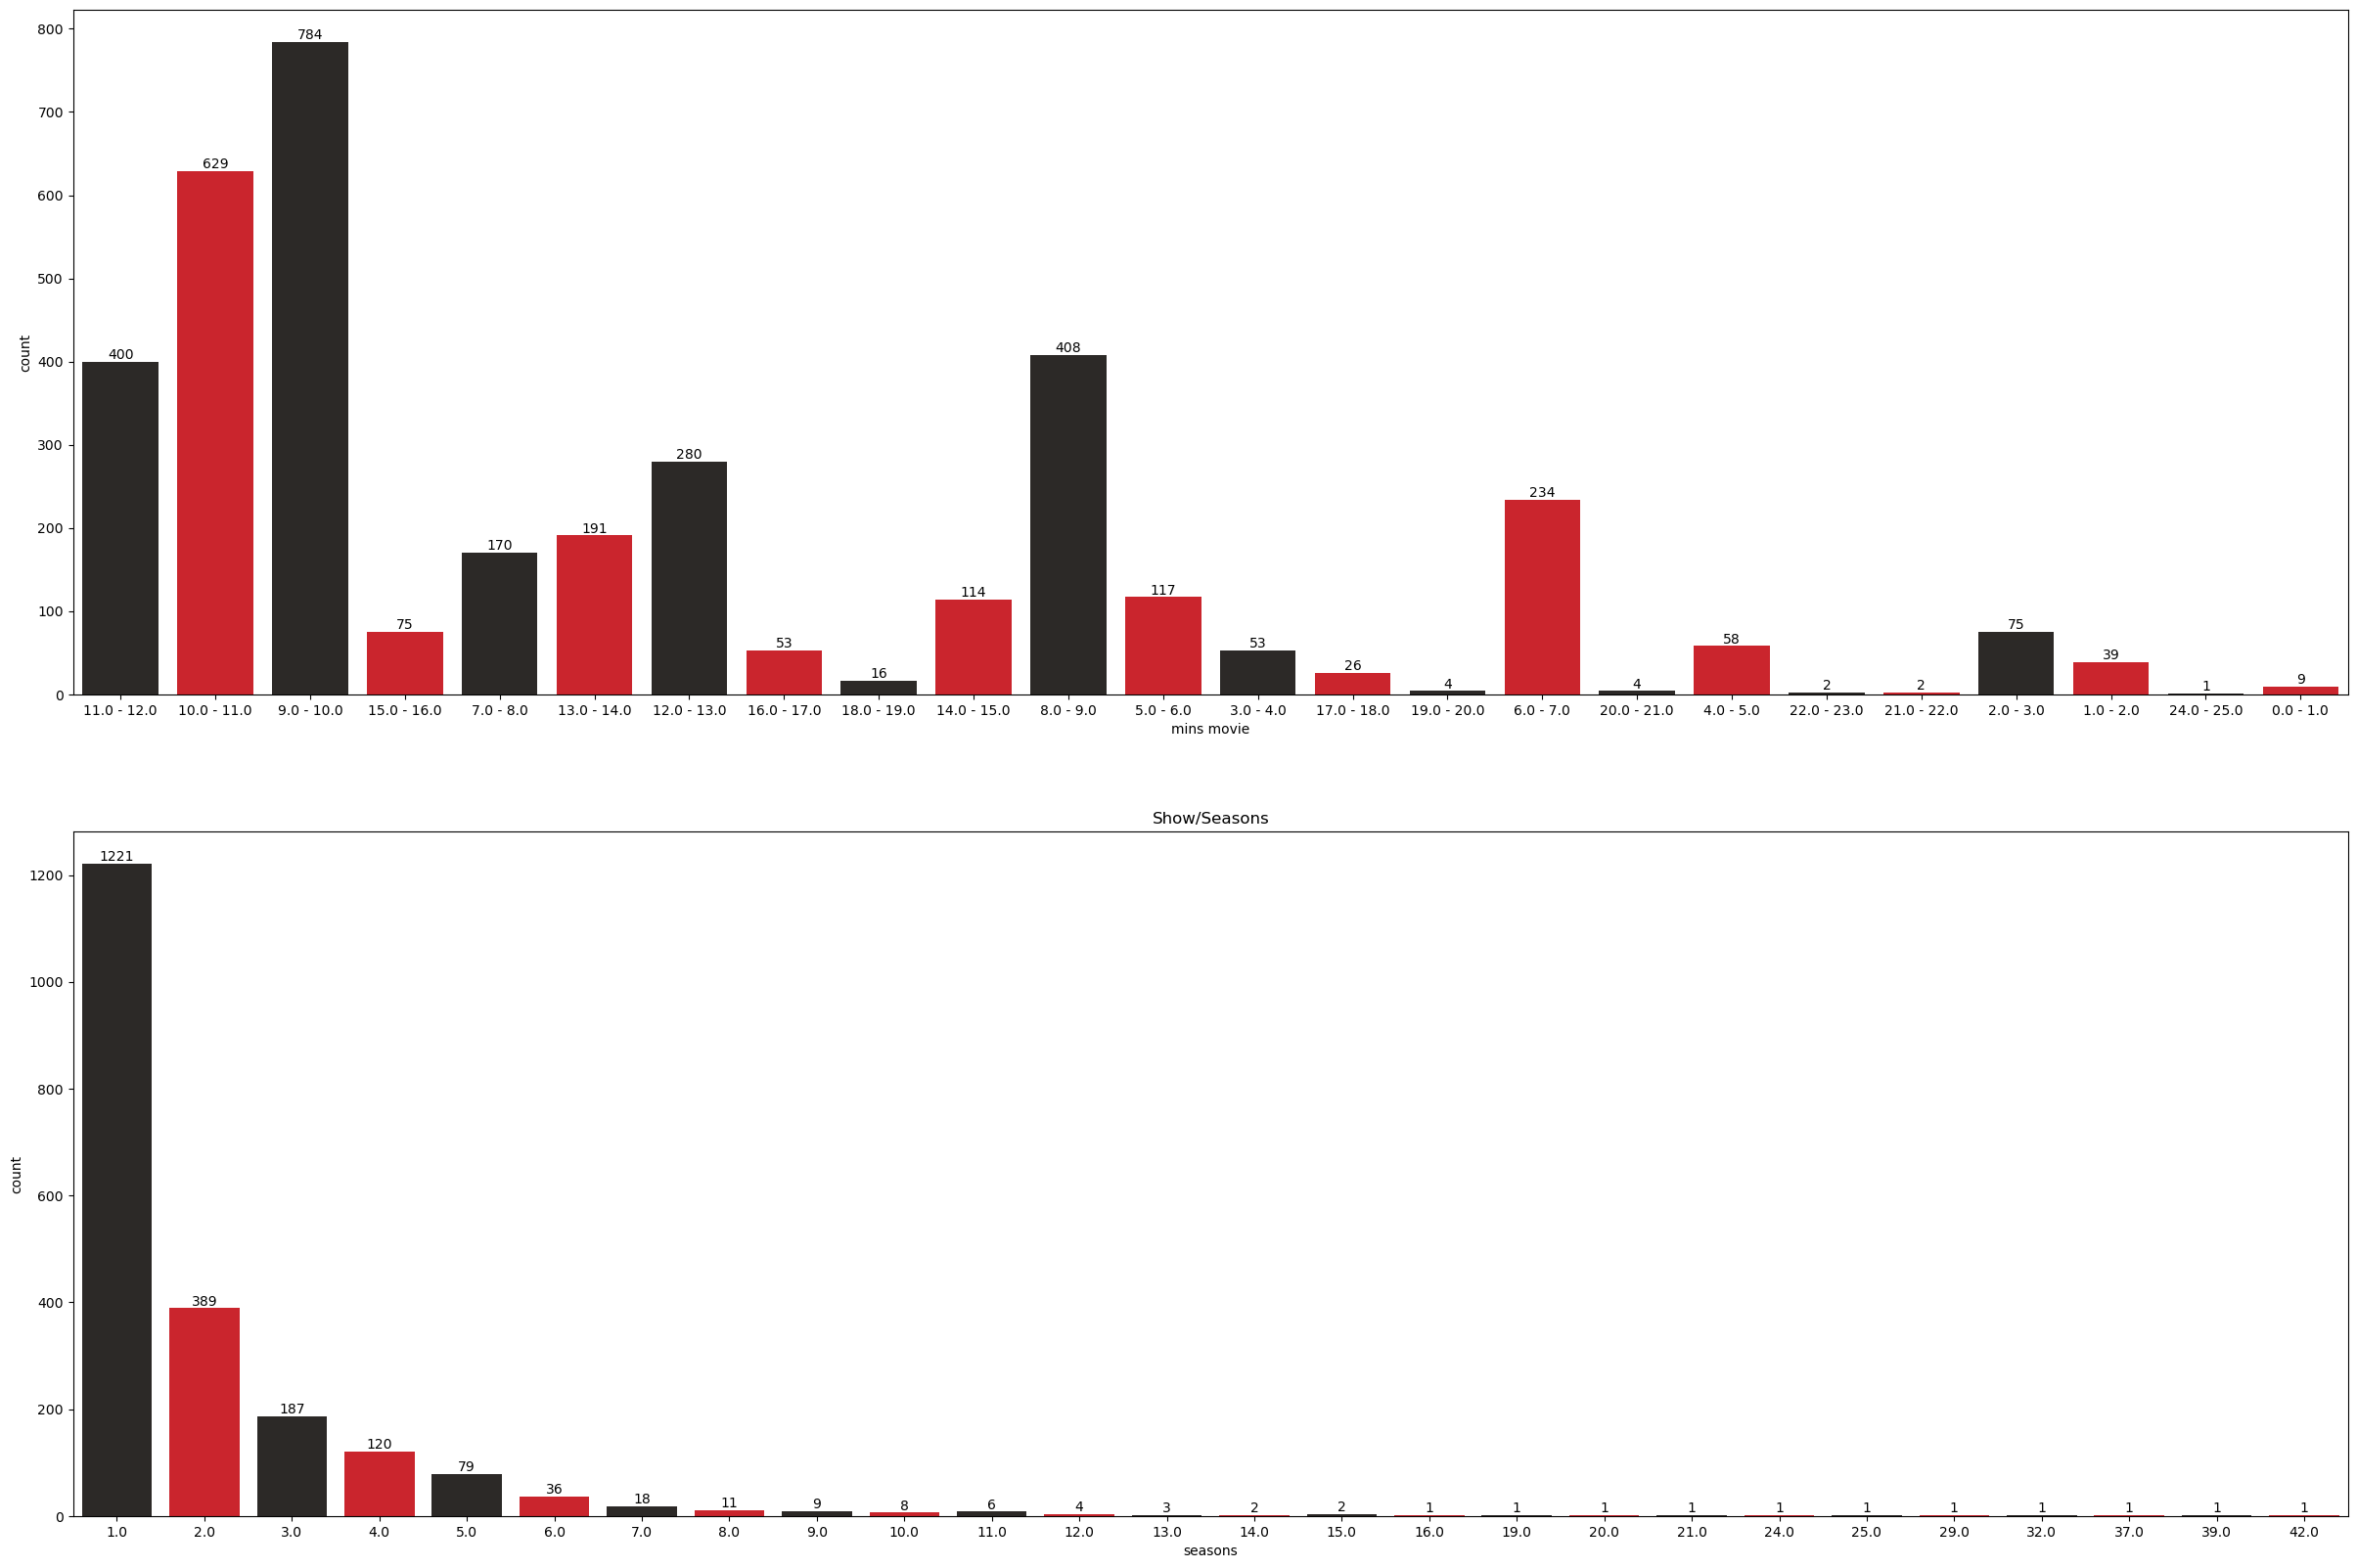

In [40]:
fig,axes = plt.subplots(nrows = 2, ncols = 1, figsize = (30,20))

ax = sns.countplot('mins movie',data = data_df.loc[(data_df['type'] == "MOVIE")],palette = colors2, ax=axes[0])
plt.title('Movies/Minutes');
ax.bar_label(container=ax.containers[0], labels= data_df[(data_df['type'] == "MOVIE")].value_counts().values)

ax = sns.countplot('seasons', data = data_df.loc[data_df['type'] == "SHOW"],palette = colors2, ax=axes[1])
plt.title('Show/Seasons')
ax.bar_label(container=ax.containers[0], labels= data_df["seasons"][(data_df['type'] == "SHOW")].value_counts().values)


plt.show()

- Biểu đồ thể hiện sự phân bố về số phút của movie và season của tvshow, từ biểu đồ ta có thể thấy phần đông lượng movie có số phút từ 90-100 phút, theo sau là 100-110 phút và 110-120 phút, còn đối với tv-show thì thường có khoảng từ 1-2 season và lượng tv-show có trên 3 season bắt đầu giảm mạnh.

## Trực quan hóa phần trăm các nước sản xuất movie/tvshow trên netflix

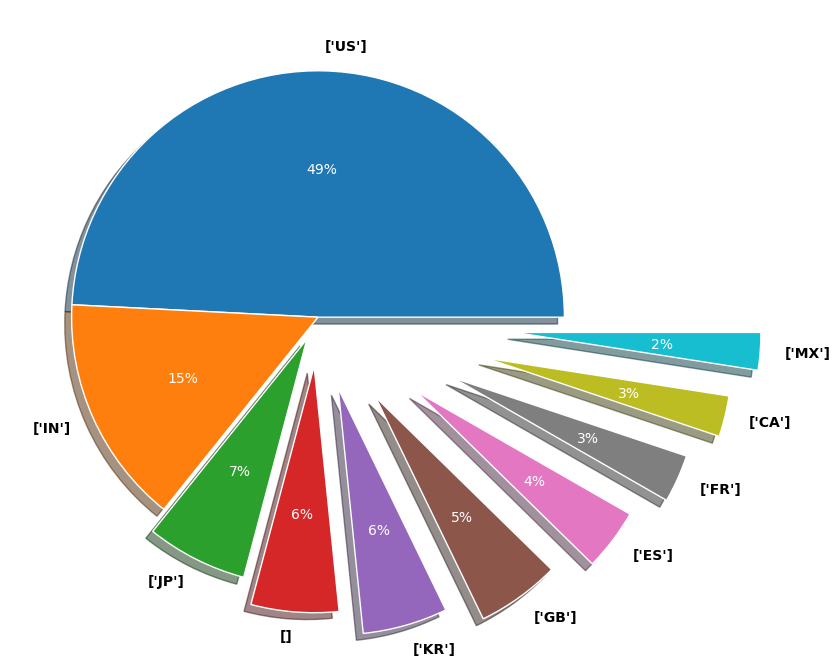

In [41]:
plt.figure(figsize=(8,8))
patches, texts, pcts=plt.pie(data_df["production_countries"].value_counts().head(10),labels=data_df["production_countries"].value_counts().head(10).index,
        autopct="%0.0f%%",shadow=True,explode=[0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],wedgeprops={'edgecolor': 'white'});
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.show()

- Nước Mỹ là nước có số lượng phim đông đảo chiếm gần 50%, sau đó là Indonesia, Nhật Bản và Hàn Quốc.

## Trực quan hóa phần trăm và tốc độ tăng trưởng số lượng movie/tvshow qua các năm

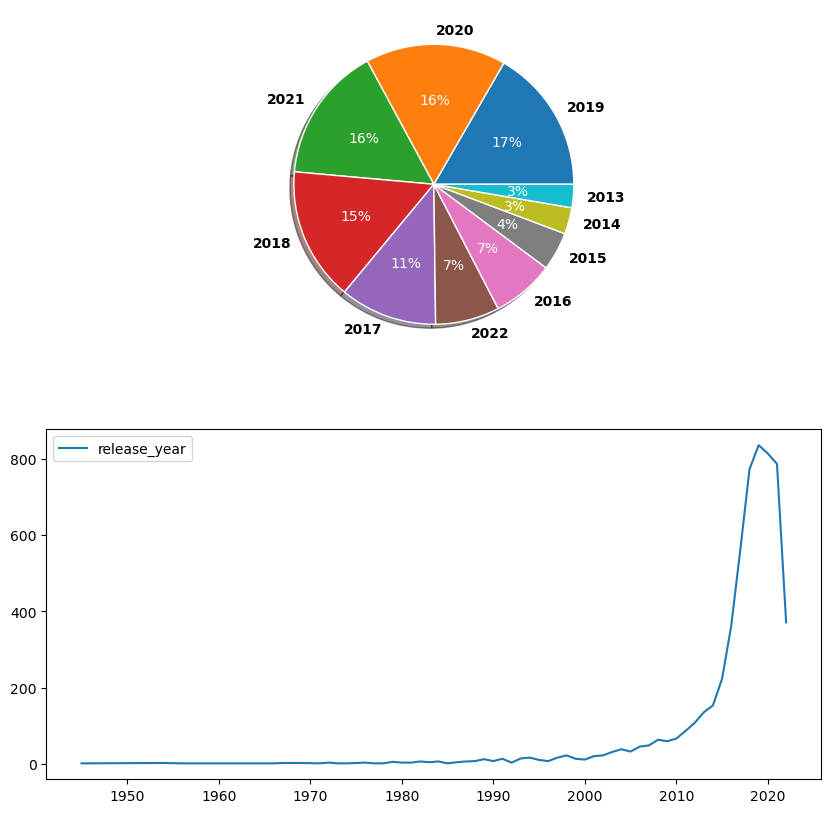

In [42]:
fig,axes=plt.subplots(1,2,figsize=(10,10))
#plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
patches, texts, pcts=plt.pie(data_df["release_year"].value_counts().head(10),labels=data_df["release_year"].value_counts().head(10).index,
        autopct="%0.0f%%",shadow=True,wedgeprops={'edgecolor': 'white'})
plt.subplot(2,1,2)
sns.lineplot(data= pd.DataFrame(data_df.release_year.value_counts()))
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.show()

- Số lượng phim trên netflix mỗi năm cũng khá đồng đều từ năm 2018-2021, nhìn vào biểu đồ line từ năm 2000 tới năm 2020 có sự tăng tưởng đột biến, đạt đỉnh về số lượng movie/tvshow trên netflix và bắt đầu tuột dần từ năm 2020-2022(nhưng có thể do dữ liệu vẫn chưa lấy hết ở năm 2022).

In [43]:
data_df["production_countries"].value_counts()

['US']                1959
['IN']                 599
['JP']                 264
[]                     229
['KR']                 222
                      ... 
['GR', 'GB', 'US']       1
['CL', 'PE']             1
['CA', 'CN', 'US']       1
['SG', 'US']             1
['PH', 'FO']             1
Name: production_countries, Length: 452, dtype: Int64

In [44]:
data_df

,id,title,type,description,release_year,age_certification,runtime,genres,mins movie,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],5.0 - 6.0,['US'],1.0,<NA>,6.6,NaN,0.600,6.900
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",11.0 - 12.0,['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",10.0 - 11.0,['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",9.0 - 10.0,['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,<NA>,150,"['war', 'action']",15.0 - 16.0,"['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,<NA>,100,"['romance', 'drama']",10.0 - 11.0,['NG'],NaN,tt13857480,6.8,45.0,1.466,6.900
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,<NA>,134,['drama'],13.0 - 14.0,[],NaN,tt11803618,7.7,348.0,NaN,6.900
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,<NA>,90,['comedy'],9.0 - 10.0,['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],3.0 - 4.0,['US'],NaN,<NA>,6.6,NaN,1.296,10.000


In [45]:
data_df["production_countries"].value_counts().head(10).index

Index(['['US']', '['IN']', '['JP']', '[]', '['KR']', '['GB']', '['ES']',
       '['FR']', '['CA']', '['MX']'],
      dtype='string')

In [46]:
data_groupby=data_df.groupby('age_certification')['imdb_score'].apply(lambda x: (x>6).sum()).reset_index(name='count')
data_groupby=data_groupby.sort_values(by=['count'],ascending=False)

## Trực quan hóa phần trăm các loại movie/tvshow age_certification có imdb_score >6 

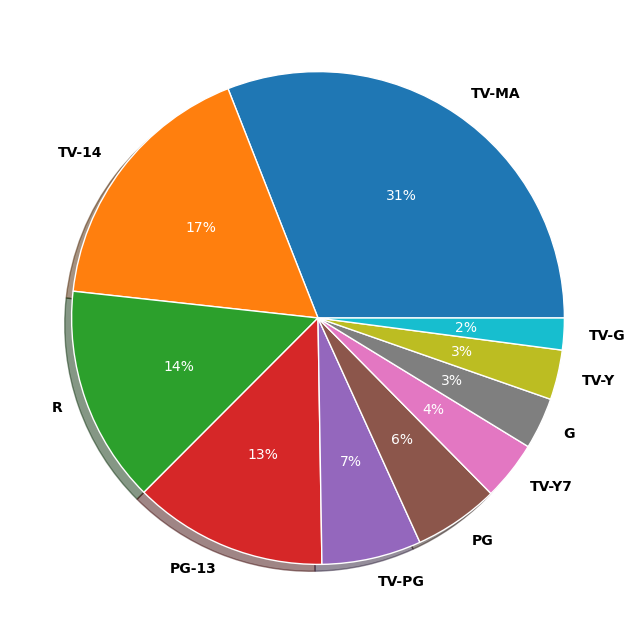

In [47]:
plt.figure(figsize=(8,8))
patches, texts, pcts=plt.pie(data_groupby["count"].head(10),labels=data_groupby["age_certification"].head(10).value_counts().index,
        autopct="%0.0f%%",shadow=True,wedgeprops={'edgecolor': 'white'});
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.show()

- Biểu đồ thể hiện các movie/tvshow có mác TV-MA (lứa tuổi trưởng thành) vẫn chiếm phần lớn các movie/tvshow có imdb score > 6 trên netflix, theo sau đó là mục TV-14 (dành cho lứa tuổi thanh thiếu niên) chiếm 17% và R (movie dành cho lứa tuổi > 13), mặc dù có số lượng movie nhãn R nhiều hơn TV-show có nhãn TV-14 nhưng imdb score > 6 lại không nhiều bằng TV-14

## Tương quan giữa các biến numeric.

In [48]:
numeric_cols=list(set(data_df.keys())-set(cate_cols))

                 release_year   runtime   seasons  imdb_score  imdb_votes  \
release_year         1.000000 -0.173551 -0.504407   -0.123868   -0.208815   
runtime             -0.173551  1.000000 -0.139642   -0.143891    0.139760   
seasons             -0.504407 -0.139642  1.000000    0.113679    0.206079   
imdb_score          -0.123868 -0.143891  0.113679    1.000000    0.190661   
imdb_votes          -0.208815  0.139760  0.206079    0.190661    1.000000   
tmdb_popularity      0.043244  0.002545  0.168051    0.016685    0.209763   
tmdb_score           0.031114 -0.270606  0.051224    0.521949    0.111985   

                 tmdb_popularity  tmdb_score  
release_year            0.043244    0.031114  
runtime                 0.002545   -0.270606  
seasons                 0.168051    0.051224  
imdb_score              0.016685    0.521949  
imdb_votes              0.209763    0.111985  
tmdb_popularity         1.000000    0.071209  
tmdb_score              0.071209    1.000000  


C:\Users\LAP12988-local\AppData\Local\Temp\ipykernel_19524\1814094179.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data_df.corr())
C:\Users\LAP12988-local\AppData\Local\Temp\ipykernel_19524\1814094179.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(),data=data_df)


<AxesSubplot:>

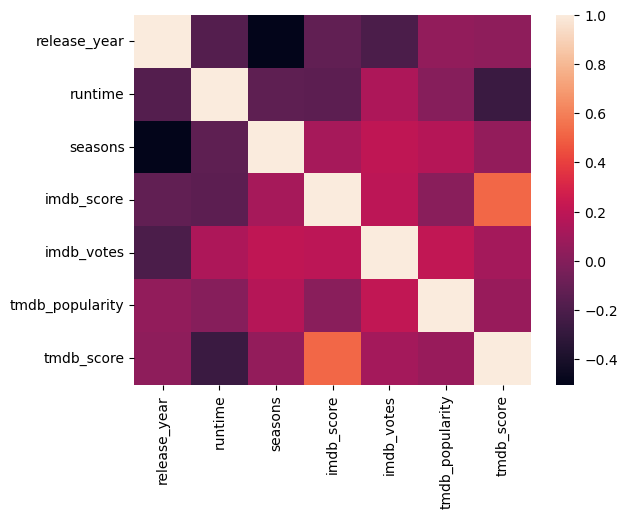

In [49]:
print(data_df.corr())
sns.heatmap(data_df.corr(),data=data_df)

- Ta có thể thấy là hầu như các cột numeric không có gì liên quan đến nhau ngoại trừ cột imdb score và tmdb-score có vẻ như là tỉ lệ thuận.

In [50]:
def regplot(dataframe, col_x, list_col_y):
    i=0
    #j=0
    rows=len(list_col_y)
    cols=1
    fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (16,20))
    for col in list_col_y:
        sns.regplot(data=dataframe,x=col_x,y=col,ax=axes[i])
        i=i+1
    plt.show()

<AxesSubplot:xlabel='imdb_score', ylabel='tmdb_score'>

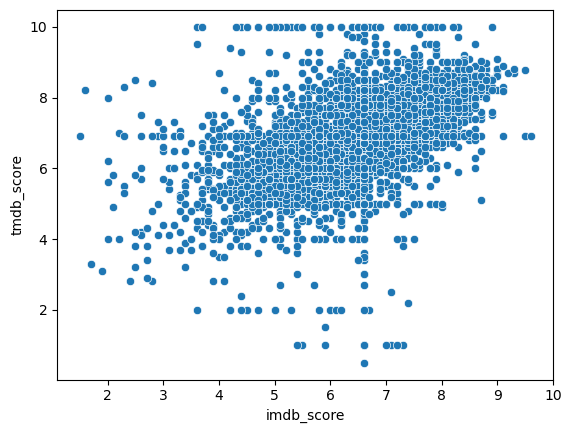

In [51]:
sns.scatterplot(data=data_df,x="imdb_score",y="tmdb_score")


In [52]:
correlation_col=["runtime","imdb_score","imdb_votes","seasons"]

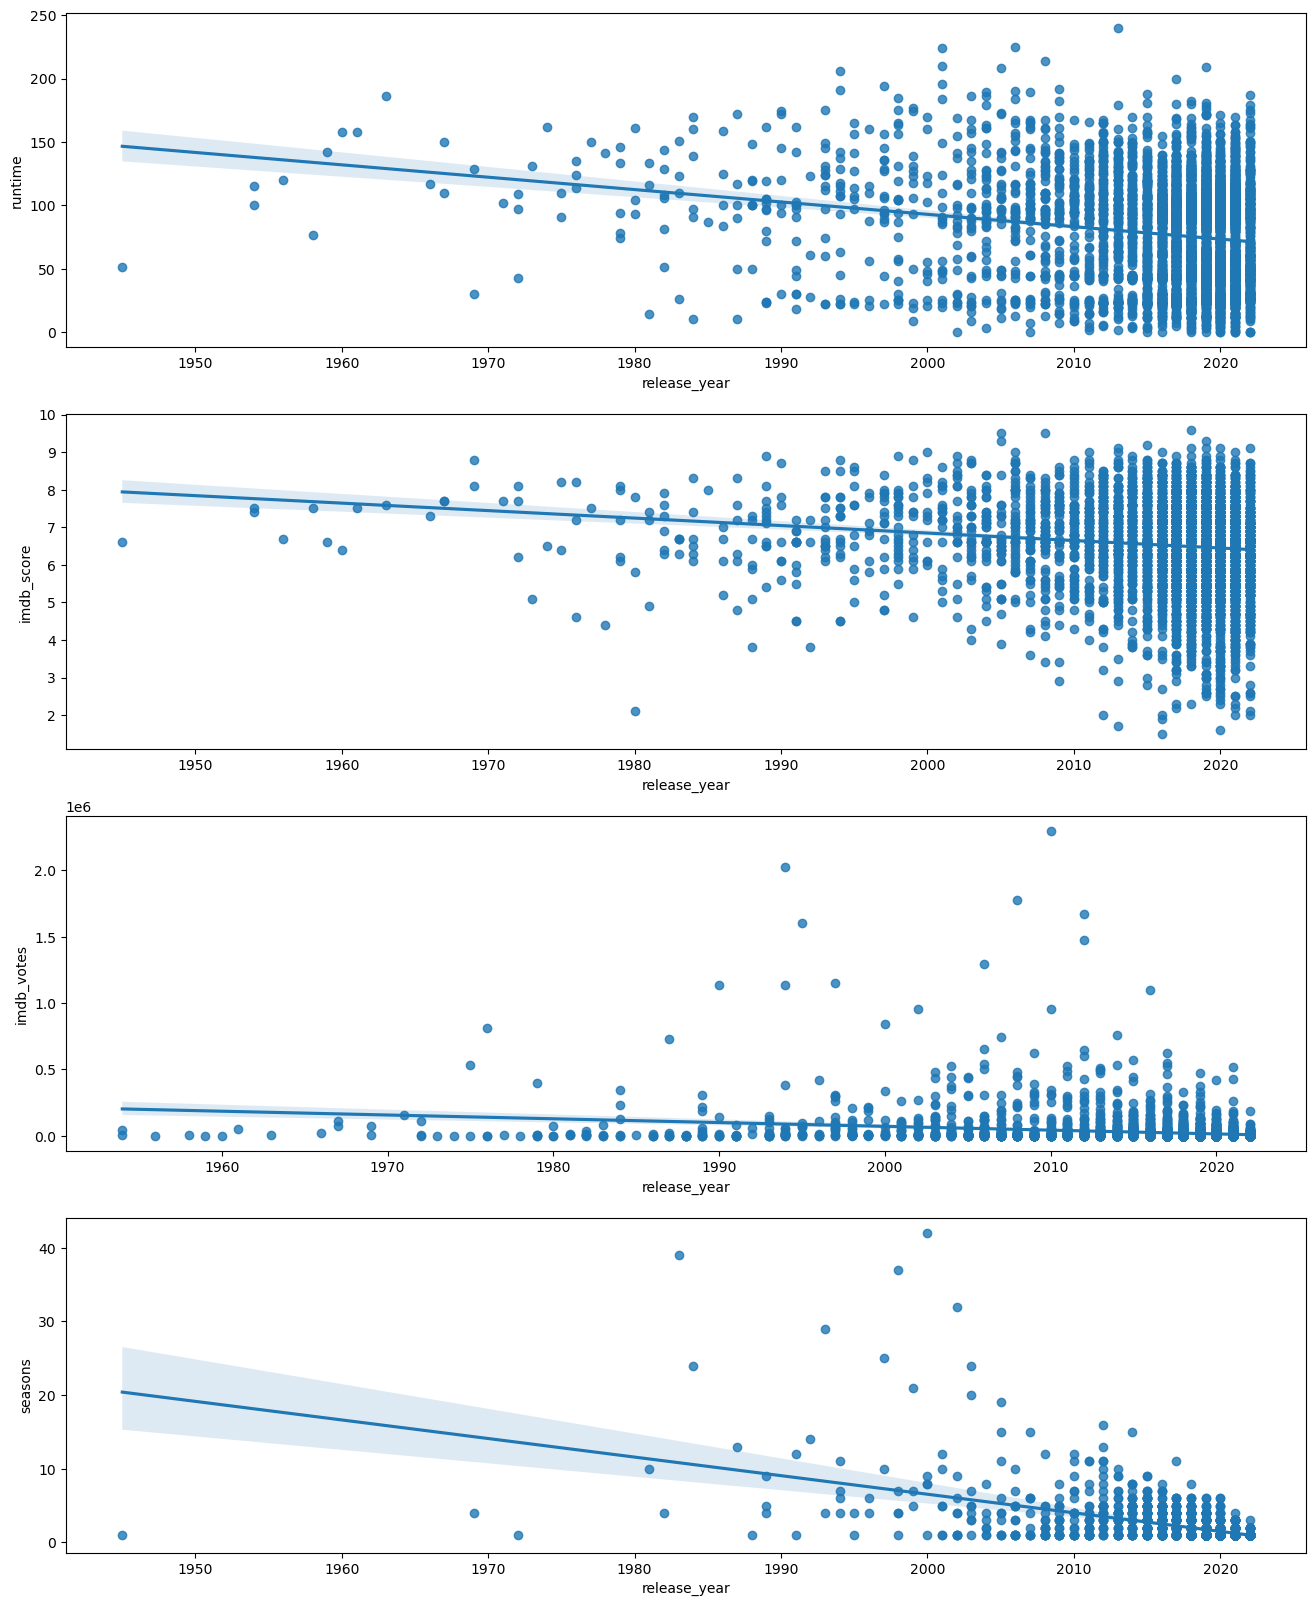

In [53]:
regplot(data_df,"release_year",correlation_col)

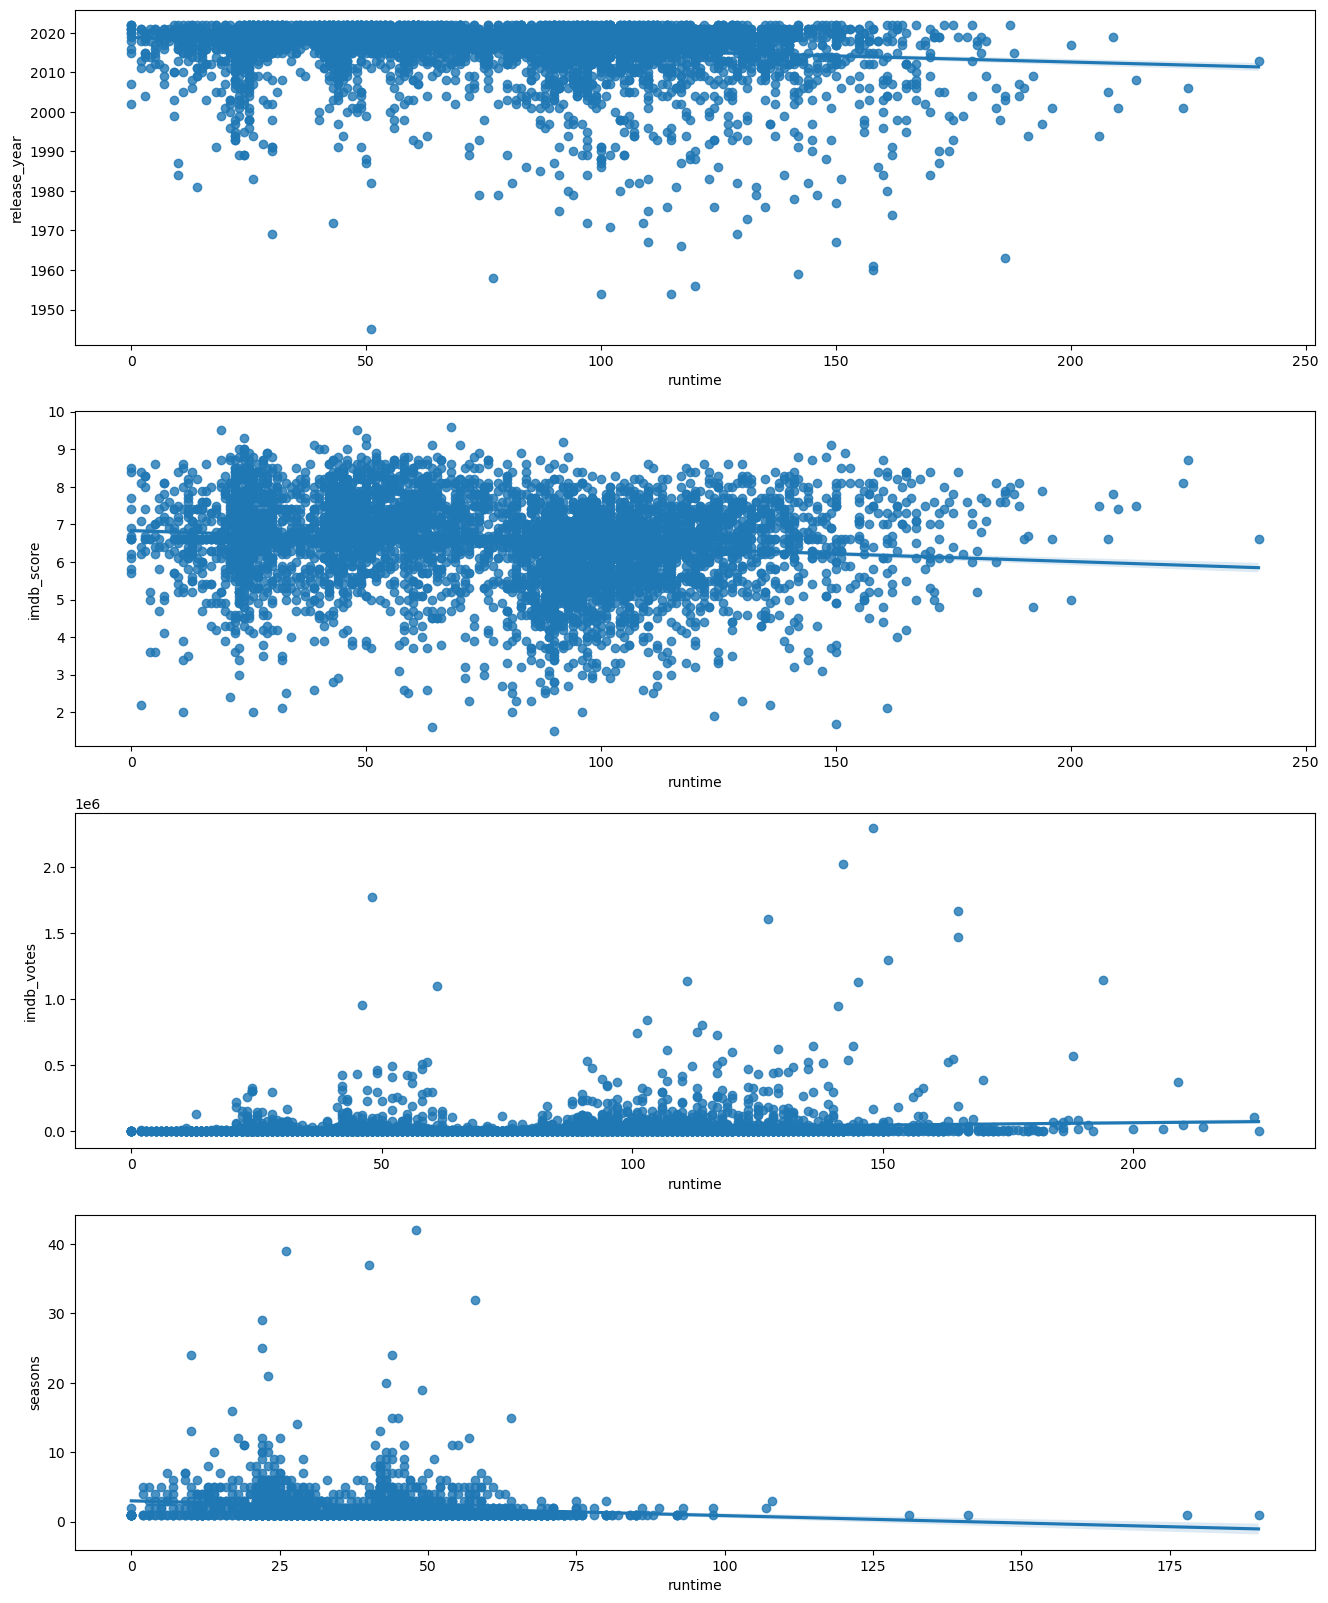

In [54]:
correlation_col=["release_year","imdb_score","imdb_votes","seasons"]
regplot(data_df,"runtime",correlation_col)